# Full-blockage Analysis

## load tables

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [40]:
agents_number_df = pd.read_csv('./agents_results.csv')
agents_number_df = agents_number_df.drop_duplicates(subset='damage')
agents_number_df = agents_number_df.groupby(['planner', 'num_agents'], as_index=False).mean()
agents_number_df.head()

,planner,num_agents,num_robots,f,d,completion_time,planner_time,damage,num_disabled
0,IterativeAssignmentPlanner,50,10.0,2.0,5.0,116.770696,0.041976,1959.724724,50.0
1,IterativeAssignmentPlanner,100,10.0,2.0,5.0,131.339478,0.150974,5079.938996,100.0
2,IterativeAssignmentPlanner,200,10.0,2.0,5.0,166.620219,0.549368,12812.733521,200.0
3,IterativeAssignmentPlanner,300,10.0,2.0,5.0,203.790126,1.232986,22642.191358,300.0
4,IterativeAssignmentPlanner,400,10.0,2.0,5.0,230.887050,2.160481,34267.022912,400.0


In [41]:
f_df = pd.read_csv('./f_results.csv')
f_df = f_df.drop_duplicates(subset='damage')
f_df = f_df.loc[(f_df['num_agents'] == 200)]
f_df = f_df.groupby(['planner','num_agents','f'], as_index=False).mean()
f_df.head()

,planner,num_agents,f,num_robots,d,completion_time,planner_time,damage,num_disabled
0,BottomUpScannerPlanner,200,1.1,10.0,5.0,279.360568,0.009964,46447.488214,36.3
1,BottomUpScannerPlanner,200,1.2,10.0,5.0,257.218567,0.010772,40570.554464,79.2
2,BottomUpScannerPlanner,200,1.3,10.0,5.0,240.920088,0.015548,35173.689684,117.5
3,BottomUpScannerPlanner,200,1.4,10.0,5.0,225.035047,0.009483,30379.232721,148.6
4,BottomUpScannerPlanner,200,1.5,10.0,5.0,210.286763,0.011096,26223.865855,175.1


In [42]:
d_df = pd.read_csv('./d_results.csv')
d_df = d_df.drop_duplicates(subset=['planner', 'damage'])
d_df = d_df.loc[(d_df['num_agents'] == 300)]
d_df = d_df.groupby(['planner', 'd'], as_index=False).mean()
d_df.head()

,planner,d,num_agents,num_robots,f,active_time,completion_time,planner_time,damage,num_disabled
0,IterativeAssignmentPlanner,3,300.0,17.0,2.0,131.697500,131.697500,1.517010,16848.174031,300.0
1,IterativeAssignmentPlanner,5,300.0,10.0,2.0,203.790126,203.790126,1.417100,22642.191358,300.0
2,IterativeAssignmentPlanner,10,300.0,5.0,2.0,386.859276,386.859276,1.381389,44086.305516,300.0
3,IterativeAssignmentPlanner,15,300.0,4.0,2.0,489.164633,489.164633,1.360750,57066.791432,300.0
4,KmeansAssignmentPlanner,3,300.0,17.0,2.0,156.034758,156.034758,2.032818,20311.065654,300.0


## visualizations

In [43]:
planners_colors = {'IterativeAssignmentPlanner': 'red',
                   'KmeansAssignmentPlanner': 'brown',
                   'StaticLinePlanner': 'blue',
                   'TravelingLinePlanner': 'orange',
                   'SeparateTravelingPlanner': 'green'}

In [44]:
from typing import List


def visualize(X: List[str], Y: List[str], data, file_to_save: str, title: str):
    plt.figure(figsize=(14, 10))
    plt.suptitle(title, fontsize=18)

    for i in range(len(Y)):
        x, y = X[i], Y[i]

        plt.subplot(2, 2, i + 1)
        plt.xlabel(x)
        plt.ylabel(y)
        for j in range(len(data)):
            r = data[j]
            plt.plot(list(r[x]), list(r[y]), c=list(planners_colors.values())[j])

        if i == 1:
            plt.legend(planners_colors.keys(), fontsize='14')

    plt.savefig(file_to_save)
    plt.show()

In [45]:
def vis_paper(X: List[str], data):
    Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']

    for i in range(len(Y)):
        x = X[i]
        y = Y[i]

        plt.xlabel(x)
        plt.ylabel(y)
        for j in range(len(data)):
            r = data[j]
            plt.plot(list(r[x]),list(r[y]), c=list(planners_colors.values())[j])

        if i == 0:
            plt.legend(planners_colors.keys(), fontsize='14')

        plt.savefig(f'./plots/{x}-{y}.png')
        plt.show()

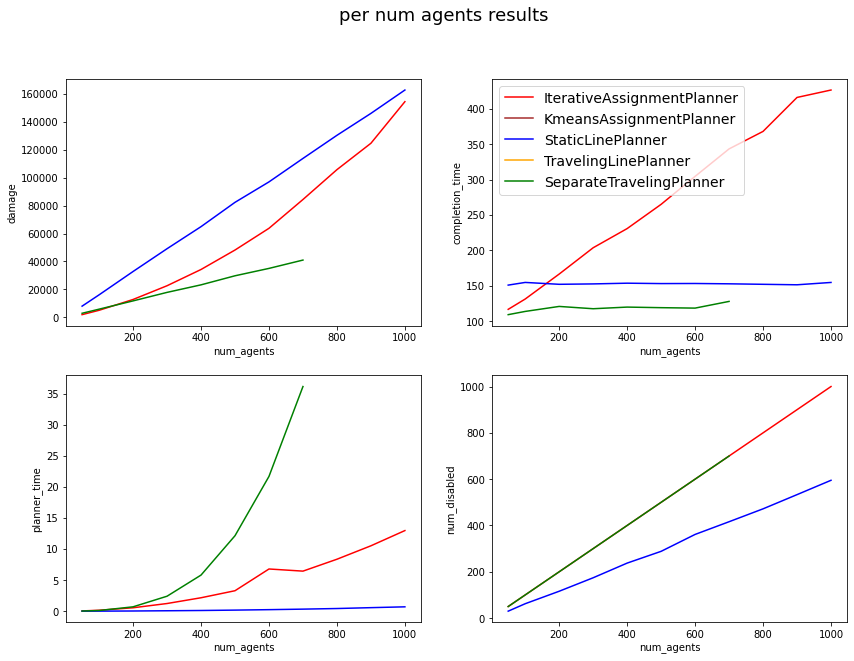

In [46]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['num_agents' for _ in Y]

agents_results = [agents_number_df.loc[agents_number_df['planner'] == name] for name in planners_colors.keys()]
title = 'per num agents results'
file_to_save = './plots/full_num_agents.png'

visualize(X, Y, agents_results, file_to_save, title)

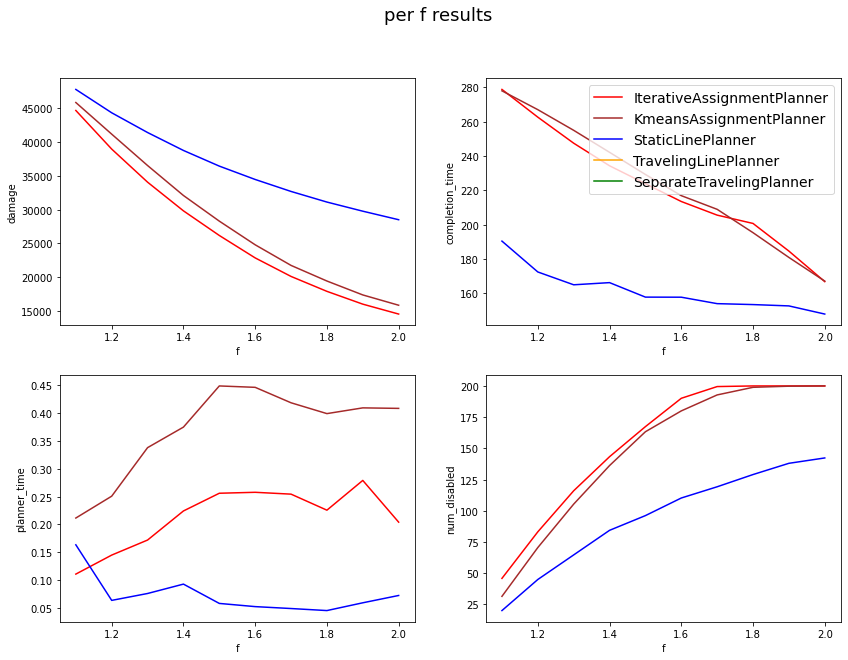

In [47]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['f' for _ in Y]

f_results = [f_df.loc[f_df['planner'] == name] for name in planners_colors.keys()]
title = 'per f results'
file_to_save = './plots/full_f.png'

visualize(X, Y, f_results, file_to_save, title)

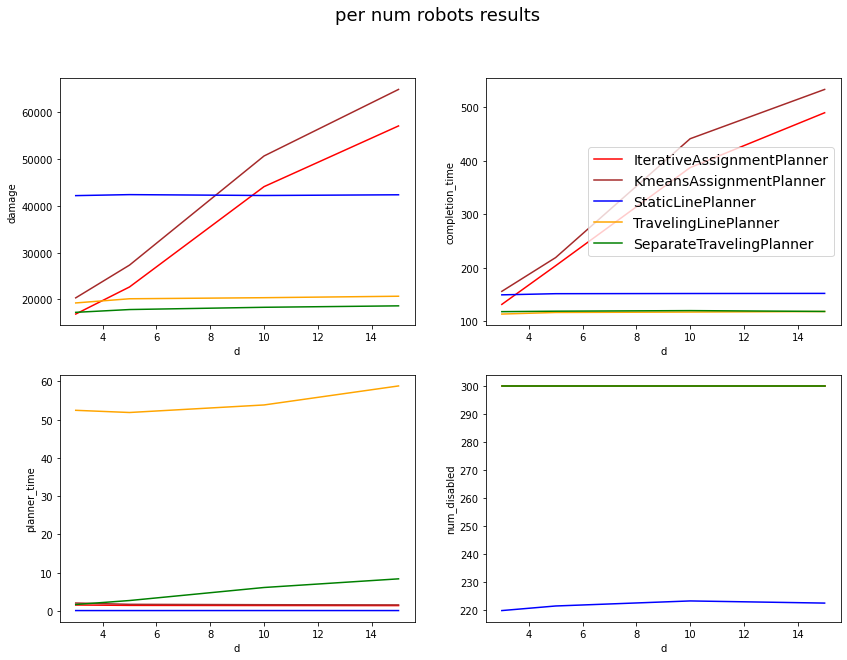

In [48]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['d' for _ in Y]

robots_results = [d_df.loc[d_df['planner'] == name] for name in planners_colors.keys()]
title = 'per num robots results'
file_to_save = './plots/full_d.png'

visualize(X, Y, robots_results, file_to_save, title)

In [ ]:
# agents_results = [agents_number_df.loc[agents_number_df['planner'] == name] for name in planners_colors.keys()]
# X = ['num_agents' for _ in Y]
# vis_paper(X, agents_results)
# f_results = [f_df.loc[f_df['planner'] == name] for name in planners_colors.keys()]
# X = ['f' for _ in Y]
# vis_paper(X, f_results)
# robots_results = [robots_df.loc[robots_df['planner'] == name] for name in planners_colors.keys()]
# X = ['num_robots' for _ in Y]
# vis_paper(X, robots_results)

## run experiments

### config file

In [ ]:
import json

with open('config.json') as json_file:
    config = json.load(json_file)
config

In [ ]:
import json
import time
from math import ceil
from random import seed

from planners.deterministic.baseline.iterative_assignment_planner import IterativeAssignmentPlanner
from planners.deterministic.full_blockage.separate_traveling_planner import SeparateTravelingPlanner
from planners.deterministic.full_blockage.static_line_planner import StaticLinePlanner
from world.agents.deterministic_agent import DeterministicAgent
from planners.deterministic.baseline.kmeans_assignment_planner import KmeansAssignmentPlanner
from planners.planner import Planner
from utils.functions import *

In [ ]:
def run(planner: Planner, file_name: str):
    agents = [DeterministicAgent(sample_point(config['x_buffer'], config['x_buffer'] + config['x_size'],
                                              config['y_buffer'], config['y_buffer'] + config['y_size_init']),
                                 config['agent_speed']) for _ in range(config['num_agents'])]

    x_min = min([a.x for a in agents])
    x_max = max([a.x for a in agents])

    num_robots_for_full_blockage = ceil((x_max - x_min) / (2 * config['disablement_range']))
    robots = [BasicRobot(sample_point(0, config['x_size'] + 2 * config['x_buffer'], 0, config['y_buffer']),
                         config['robot_speed'], config['disablement_range'])
              for _ in range(num_robots_for_full_blockage)]

    env = Environment(agents=agents, robots=robots, border=config['y_size'] + config['y_buffer'])

    before = time.time()
    movement, completion_time, expected_damage, expected_num_disabled = planner.plan(env)
    planning_time = time.time() - before

    write_report(planner=str(planner),
                 num_agents=config['num_agents'],
                 num_robots=num_robots_for_full_blockage,
                 f=config['robot_speed'] / config['agent_speed'],
                 d=config['disablement_range'],
                 active_or_copmletion_time=completion_time,
                 planner_time=planning_time,
                 damage=expected_damage,
                 num_disabled=expected_num_disabled,
                 file_name=file_name)


In [ ]:
planners = [SeparateTravelingPlanner()]

for planner in planners:
    # for alpha in [math.pi / 3]:
    #     planner.alpha = alpha
    for v in tqdm([300, 400, 500]):
        print(f'*** *** v={v} *** ***')
        for s in range(5):
            seed(s)

            config['num_agents'] = v
            print(f'running {str(planner)} with seed {s}..')
            try:
                run(planner, 'agents_results.csv')
            except:
                print('pass')